# Medical Insurance Cost Prediciton (Data Challenge 1)

## Taiyo Williamson
@author: taiyyoson

## CS 463/663 — Machine Learning
### Spring 2025

**Expectations**
- You are allowed (and expected to) use external packages and libraries (e.g., scikit-learn, matplotlib, pandas, and others)
- You are allowed to consult external sources (notes, etc.)
- You are allowed to discuss your model's performance and general ideas ... but you are not allowed to use external data sources beyond the provided dataset, nor are you allowed to discuss specific solutions with others inside or outside the course.


You must use regression techniques for this challenge. The challenge is to achieve the best possible performance through data preprocessing, feature engineering, proper validation techniques, and appropriate regularization. You are required to document your findings and explain all choices you make. You may use a Jupyter notebook to capture the output at every step. Any plots (charts, graphs) you create in terms of documenting or explaining must be constructed using matplotlib or seaborn -OR- must have approval from the instructor. Work hard, and have fun!

### **Goals/Tasks:**
1. Task 1

Before training a regression model, it's essential to analyze and preprocess the data to ensure that it's suitable for analysis and modeling. This step involves handling missing values, converting categorical variables into numerical representations, and performing feature engineering to extract useful information from the existing features.

2. Task 2

Develop the best regression model for predicting medical insurance costs using the provided training dataset.

3. Task 3

Use the provided test dataset to generate predictions using your model.


### Background


- Dataset and Workflow

Download these three filesLinks to an external site.:

- train_data.csv: Contains features for training your model (age, sex, bmi, children, smoker, region)
- train_labels.csv: Contains the target values (insurance charges) for the training data
- test_data.csv: Contains ONLY features for testing your model (NO labels provided)

You'll use train_data.csv and train_labels.csv to develop, train, and validate your model. Since you don't have the actual test labels, you should use validation techniques (like cross-validation) on your training data to estimate how well your model will perform on unseen data.

After finalizing your model, you'll use it to make predictions on test_data.csv. These predictions will be evaluated against the actual test labels, which only the instructor has access to.

### Dataset Features

- age: Age of the primary beneficiary (numeric)
- sex: Gender of the insurance contractor (categorical: 'male', 'female')
- bmi: Body mass index (numeric)
- children: Number of dependents covered by health insurance (numeric)
- smoker: Smoking status (categorical: 'yes', 'no')
- region: The beneficiary's residential area in the US (categorical: 'northeast', 'southeast', 'southwest', 'northwest')
- charges: Individual medical costs billed by health insurance (numeric, target variable)


### Submission

You must submit TWO files:

**Your implementation - A Jupyter notebook (e.g., DC1.ipynb) containing:**
- Data exploration and preprocessing
- Feature engineering
- Model training
- Validation techniques (cross-validation is strongly recommended)
- Final model training on the entire training dataset
- Code that generates predictions for the test dataset
- Clear documentation of your process and decisions
- Your predictions - A CSV file (e.g., insurance_predictions.csv) containing:
- ONLY your predicted medical costs for the test dataset
- The file should have a single column with no header
- The predictions should be in the same order as the rows in test_data.csv

IMPORTANT: Since you don't have the actual test labels, you won't know your final performance until after grading. Your grade will be determined by how well your predictions match the actual test labels that only the instructor has.


In [316]:
## importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.api import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
 

## Task 1

Before training a regression model, it's essential to analyze and preprocess the data to ensure that it's suitable for analysis and modeling. This step involves handling missing values, converting categorical variables into numerical representations, and performing feature engineering to extract useful information from the existing features.


**parts of my implementation**
- Data exploration and preprocessing
- Feature engineering

1. **IMPORTING DATA**

In [317]:
import os

## importing data through google drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# project_folder = '/content/drive/My Drive/CS463/projects/'

## importing data through local machine (jupyter/IDE/code editor)
project_folder = '/Users/happiness/Desktop/463cs/projects/463_dc_1/datasets' ## my filepath on my local machine

train_data_f_path = os.path.join(project_folder, 'train_data.csv')
train_labels_f_path = os.path.join(project_folder, 'train_labels.csv')
test_data_f_path = os.path.join(project_folder, 'test_data.csv')

train_df = pd.read_csv(train_data_f_path)
train_labels_df = pd.read_csv(train_labels_f_path)
test_df = pd.read_csv(test_data_f_path)

In [318]:
print("Displaying Top 5 Rows:")
display(train_df.head())

print("Displaying Bottom 5 Rows: ")
train_df.tail()

Displaying Top 5 Rows:


,age,sex,bmi,children,smoker,region
0,46,female,19.95,2,no,northwest
1,47,female,24.32,0,no,northeast
2,52,female,24.86,0,no,southeast
3,39,female,34.32,5,no,southeast
4,54,female,21.47,3,no,northwest


Displaying Bottom 5 Rows: 


,age,sex,bmi,children,smoker,region
1065,18,female,31.350,4,no,northeast
1066,39,female,23.870,5,no,southeast
1067,58,male,25.175,0,no,northeast
1068,37,female,47.600,2,yes,southwest
1069,55,male,29.900,0,no,southwest


- **Numerical Variables (int/float):**
  - `age`: Age of the individual.
  - `bmi`: Body Mass Index, a measure of body fat based on height and weight.
  - `children`: Number of children/dependents.
  - `charges`: Medical insurance cost (our target variable).

- **Categorical Variables (object):**
  - `sex`: Male or Female.
  - `smoker`: Yes or No.
  - `region`: One of four geographical regions.

2. **CLEANING DATA/PREPROCESSING/EDA**

In [319]:
## finding presence of null values
null_values = train_df.isnull().sum()
print("\n\nCount of Null Values per Column: ")
print(null_values, "\n")

train_df.info()
# just for the sake of checking, printing a random row in the dataset
display(train_df.sample())

## shape/size of dataset
print(f"Shape of Dataset: {train_df.shape} ")
print(f"Shape of Labels {train_labels_df.shape}")




Count of Null Values per Column: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 50.3+ KB


,age,sex,bmi,children,smoker,region
862,18,male,33.535,0,yes,northeast


Shape of Dataset: (1070, 6) 
Shape of Labels (1070, 1)


,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477
std,14.073960,6.043386,1.215983
min,18.000000,15.960000,0.000000
25%,27.000000,26.205000,0.000000
50%,39.500000,30.210000,1.000000
75%,51.000000,34.496250,2.000000
max,64.000000,53.130000,5.000000


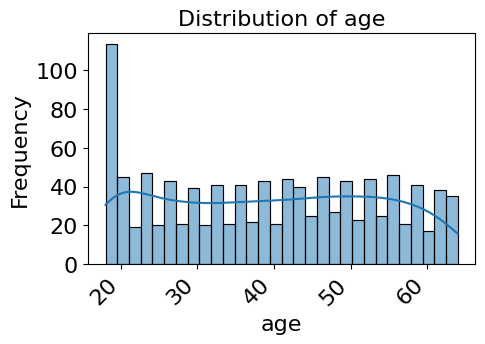

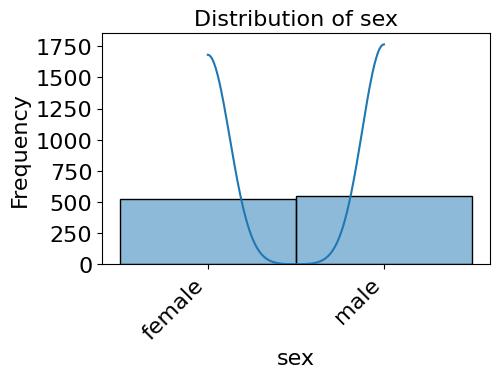

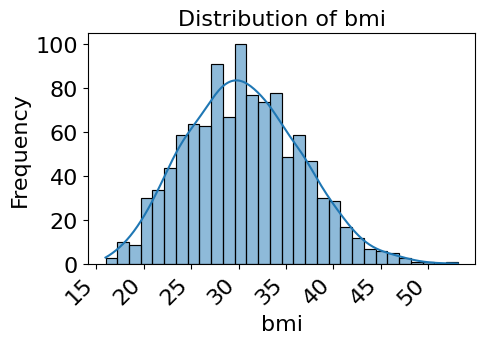

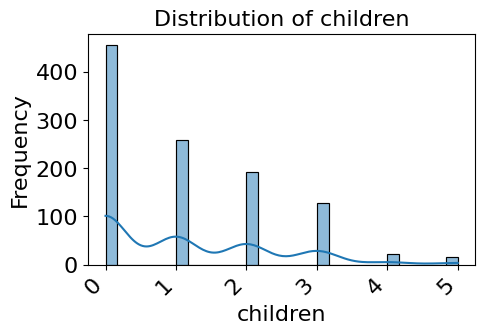

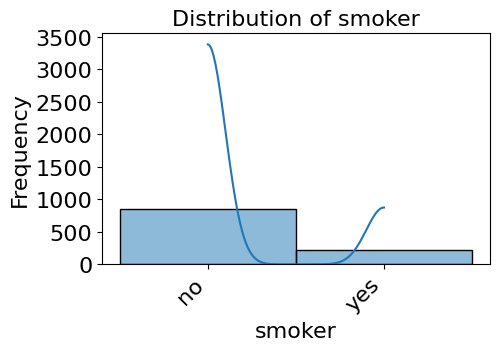

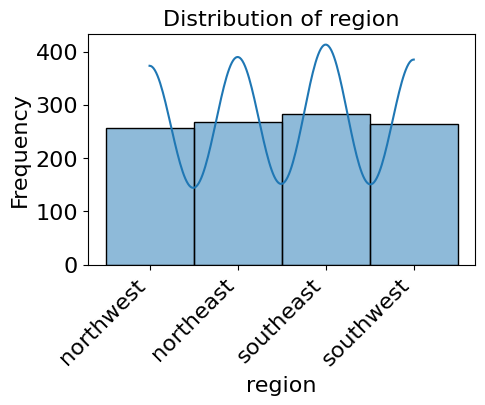

In [320]:
display(train_df.describe())

## creating histograms of each variable (excluding date columns), check distribtuion
for column in train_df.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(train_df[column], bins=30, kde=True)  # Use histplot with bins (# of bars)
    plt.title(f'Distribution of {column}', fontsize=16) # Add a title
    plt.xlabel(column, fontsize=16) # column name as x-axis label
    plt.ylabel('Frequency', fontsize=16) # y-axis label
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

- converting categorical variables

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,46,19,2,0,0,1,0,0
1,47,24,0,0,0,0,0,0
2,52,24,0,0,0,0,1,0
3,39,34,5,0,0,0,1,0
4,54,21,3,0,0,1,0,0


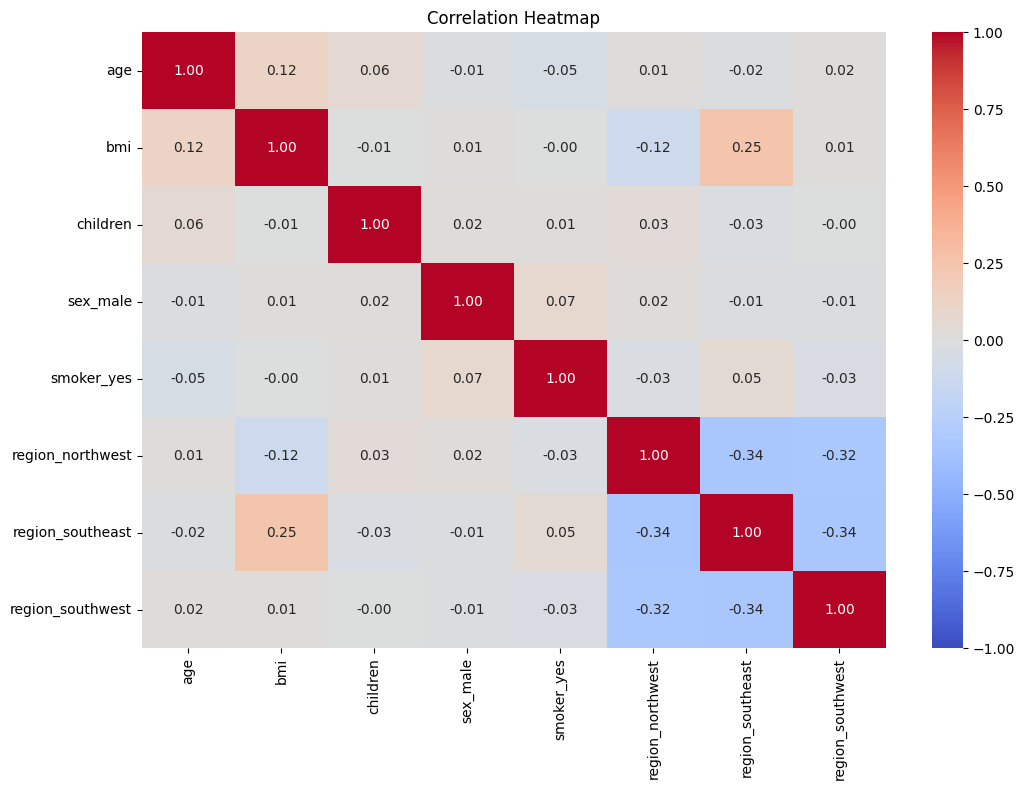

In [321]:
## one-hot encoding of categorical variables
df_one_hot = pd.get_dummies(train_df, drop_first=True)
df_one_hot = df_one_hot.astype(int)
cleaned_df = df_one_hot

## have to do the same for test data
test_df_one_hot = pd.get_dummies(test_df, drop_first=True)
test_df_one_hot = test_df_one_hot.astype(int)
test_cleaned_df = test_df_one_hot


display(cleaned_df.head())

# Calculate Pearson correlation coefficient between all pairs of columns in df
corr_df = cleaned_df 
correlation_matrix = corr_df.corr(numeric_only=True)


#heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

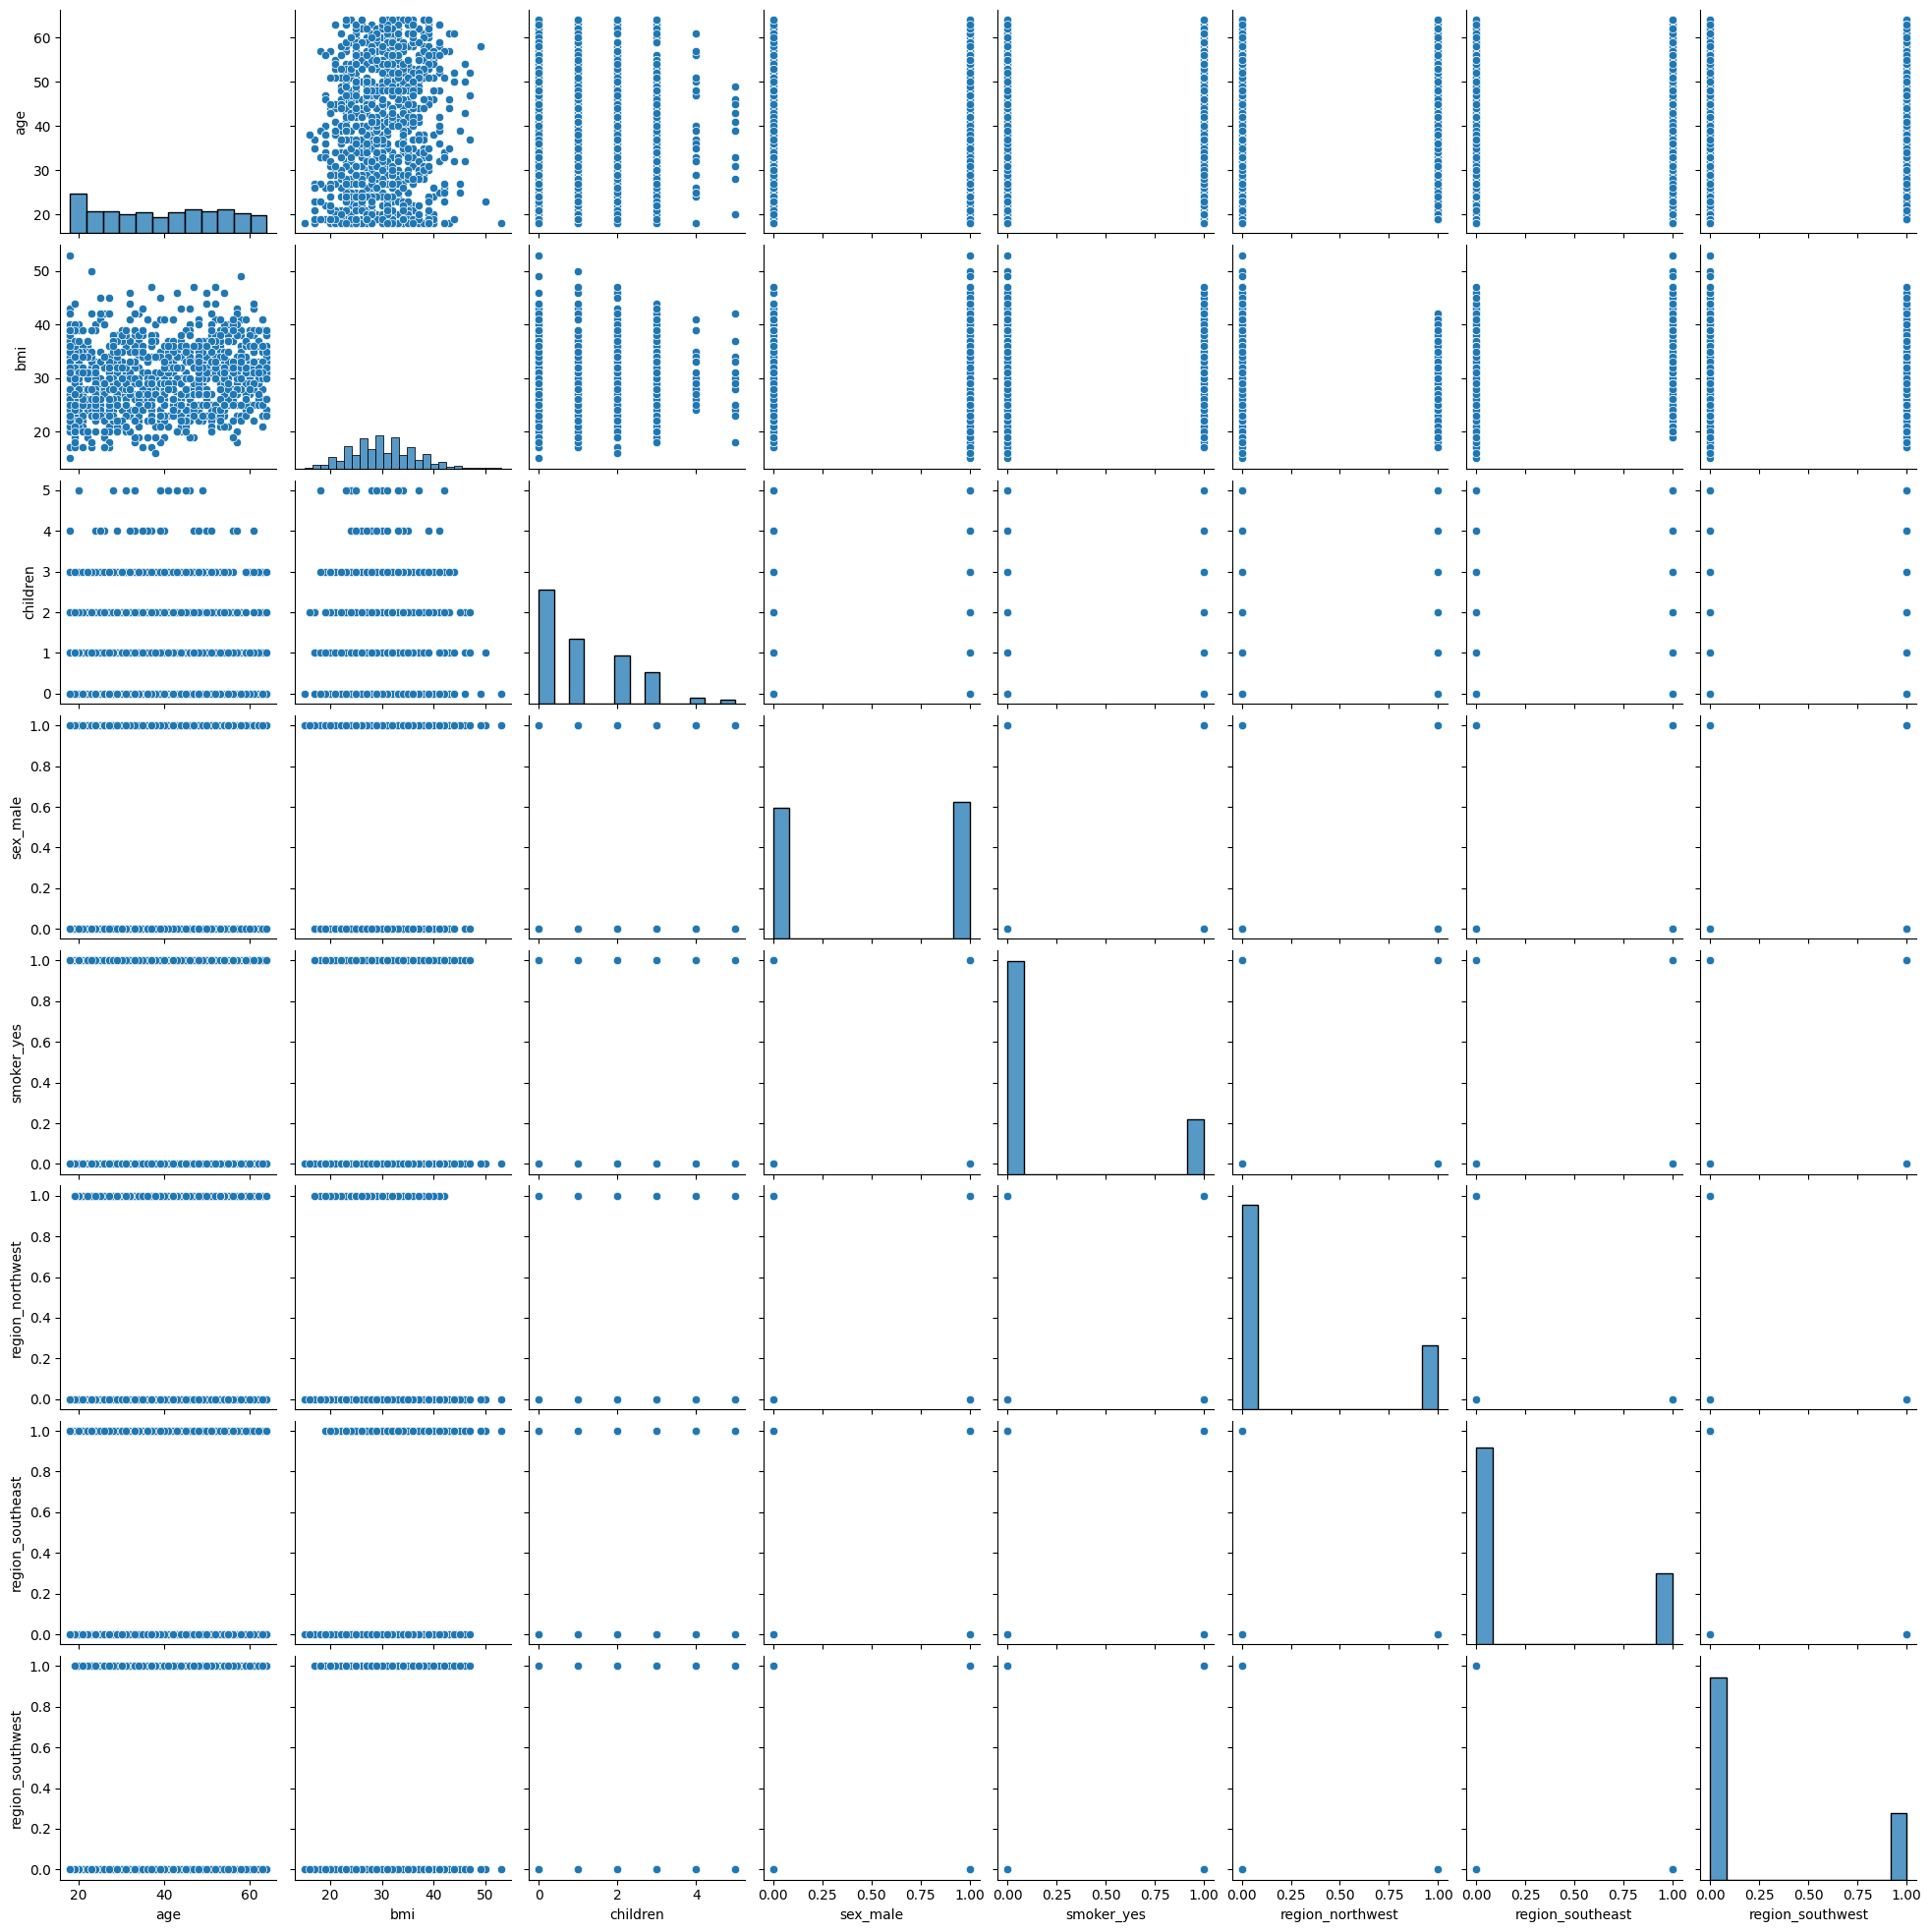

In [322]:
## pairplot
columns_to_plot = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
plt.figure(figsize=(10,6))  
sns.pairplot(cleaned_df, vars=columns_to_plot)
plt.show()

In [ ]:
## binning age then transforming that with smoker-yes to reflect increased risk and higher predictive medical insurance costs with older + smoker_yes

## first binning age
cleaned_df['age_bins'] = pd.cut(cleaned_df['age'], bins=[0,18,35,60, np.inf], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
cleaned_df = pd.get_dummies(cleaned_df, columns=['age_bins'], drop_first=False)
cleaned_df = cleaned_df.astype(int)




## do the same with test data
test_cleaned_df['age_bins'] = pd.cut(test_cleaned_df['age'], bins=[0,18,35,60, np.inf], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
test_cleaned_df = pd.get_dummies(test_cleaned_df, columns=['age_bins'], drop_first=False)
test_cleaned_df = test_cleaned_df.astype(int)


cleaned_df['smoker_bmi_interaction'] = (cleaned_df['bmi'] * cleaned_df['smoker_yes']) 
test_cleaned_df['smoker_bmi_interaction'] = (test_cleaned_df['bmi'] * test_cleaned_df['smoker_yes']) 






display(cleaned_df.head())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bins_Young,age_bins_Adult,age_bins_Middle-Aged,age_bins_Senior,smoker_bmi_interaction
0,46,19,2,0,0,1,0,0,0,0,1,0,0
1,47,24,0,0,0,0,0,0,0,0,1,0,0
2,52,24,0,0,0,0,1,0,0,0,1,0,0
3,39,34,5,0,0,0,1,0,0,0,1,0,0
4,54,21,3,0,0,1,0,0,0,0,1,0,0


- feature scaling with standardization

In [324]:
## scale the training set (Fit on training data only)
scaler = StandardScaler()
columns_scale = ['age', 'bmi', 'children', 'smoker_bmi_interaction']
X_SCALED = cleaned_df
X_SCALED[columns_scale] = scaler.fit_transform(X_SCALED[columns_scale])  # Learn mean & std from training data
SCALED_TEST_DATA = test_cleaned_df
SCALED_TEST_DATA[columns_scale] = scaler.transform(SCALED_TEST_DATA[columns_scale])


## Task 2

Develop the best regression model for predicting medical insurance costs using the provided training dataset.

**parts of my implementation**
- Model training
- Validation techniques (cross-validation is strongly recommended)
- Final model training on the entire training dataset

1. **BASELINE LINEAR REGRESSION MODEL**

In [325]:
## linear regression baseline model
X_train, X_test, y_train, y_test = train_test_split(X_SCALED, train_labels_df['charges'], test_size=0.2, random_state=42)


## linear regression baseline model
multi_reg = LinearRegression()

## fit and predict model
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

## calculating R^2 and RMSE scores for performance indicators
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"RMSE score of Multiple Linear Regression Model: {rmse_multi}")




RMSE score of Multiple Linear Regression Model: 6165.8807402618595


In [326]:
X_SCALED.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bins_Young,age_bins_Adult,age_bins_Middle-Aged,age_bins_Senior,smoker_bmi_interaction
0,0.472227,-1.826300,0.734336,0,0,1,0,0,0,0,1,0,-0.455968
1,0.543313,-1.001350,-0.911192,0,0,0,0,0,0,0,1,0,-0.455968
2,0.898745,-1.001350,-0.911192,0,0,0,1,0,0,0,1,0,-0.455968
3,-0.025379,0.648549,3.202629,0,0,0,1,0,0,0,1,0,-0.455968
4,1.040918,-1.496320,1.557100,0,0,1,0,0,0,0,1,0,-0.455968


- regularization necessary, since there is multicollinearity among our predictor variables

In [327]:

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = cleaned_df.columns
vif_data["VIF"] = [variance_inflation_factor(cleaned_df.values, i) for i in range(cleaned_df.shape[1])]

print(vif_data)

                   Feature       VIF
0                      age  5.866764
1                      bmi  1.151148
2                 children  1.041968
3                 sex_male  1.009238
4               smoker_yes  6.182148
5         region_northwest  1.538103
6         region_southeast  1.617369
7         region_southwest  1.563016
8           age_bins_Young  2.060219
9           age_bins_Adult  4.988910
10    age_bins_Middle-Aged  5.256098
11         age_bins_Senior  2.462944
12  smoker_bmi_interaction  6.347765


- running linear regression & measuring `R^2` with and without bmi to see if it suffers from collinearity

In [328]:
X_train = cleaned_df 
y = train_labels_df

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Original model with all predictors
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)

# Model without bmi
X_train_no_bmi = X_train.drop(columns=['bmi'])
X_test_no_bmi = X_test.drop(columns=['bmi'])

multi_reg_no_bmi = LinearRegression()
multi_reg_no_bmi.fit(X_train_no_bmi, y_train)
y_pred_no_bmi = multi_reg_no_bmi.predict(X_test_no_bmi)
r2_no_bmi = r2_score(y_test, y_pred_no_bmi)

# Compare results
print(f'Original Model R² (with bmi): {r2_multi:.4f}')
print(f'New Model R² (without bmi): {r2_no_bmi:.4f}')


Original Model R² (with bmi): 0.7617
New Model R² (without bmi): 0.7543


- indication: practically fine, bmi can be kept in, but **NEED** to perform regularization via L2, aka Ridge regression model

2. **RIDGE REGRESSION MODEL PLUS FEATURE ENGINEERING**

- performing cross validation to identify best polynomial degree to perform ridge, fit model

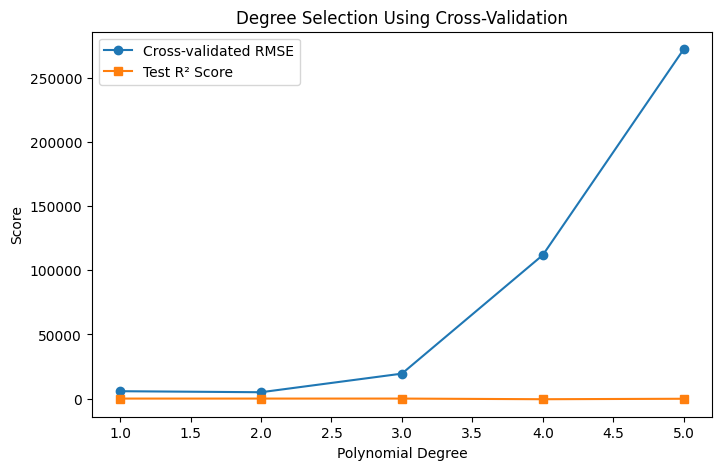

Best Polynomial Degree: 2


In [329]:

# Step 1: Define features and target
X = X_SCALED
y = train_labels_df['charges']

# Step 2: Split into training and testing sets BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale features
X_train_scaled = X_train ## mind you, the given dataset is ALREADY SCALED
X_test_scaled = X_test

# Step 4: Define polynomial degrees to test
degrees = range(1, 6)  # Test degrees 1 to 5
rmse_scores = []
r2_scores = []

# Step 5: Iterate through polynomial degrees
for degree in degrees:
    # Create a pipeline with polynomial transformation and linear regression
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

    # Perform 5-fold cross-validation on training data
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

    # Compute RMSE and R²
    rmse = np.mean(np.sqrt(-scores))
    model.fit(X_train_scaled, y_train)
    r2 = model.score(X_test_scaled, y_test)

    # Store results
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Step 6: Plot validation curve
plt.figure(figsize=(8,5))
plt.plot(degrees, rmse_scores, marker='o', label="Cross-validated RMSE")
plt.plot(degrees, r2_scores, marker='s', label="Test R² Score")
plt.xlabel("Polynomial Degree")
plt.ylabel("Score")
plt.title("Degree Selection Using Cross-Validation")
plt.legend()
plt.show()

# Step 7: Select the best polynomial degree (smallest RMSE)
best_degree = degrees[np.argmin(rmse_scores)]
print(f"Best Polynomial Degree: {best_degree}")

In [330]:
# Create final polynomial transformer with best degree
poly = PolynomialFeatures(best_degree, include_bias=False)

# Transform training and testing data
X_train_poly_scaled = poly.fit_transform(X_train_scaled)
X_test_poly_scaled = poly.transform(X_test_scaled)

### Apply Ridge Regularization ###
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train_poly_scaled, y_train)

# Predictions & Evaluation
y_ridge_pred = ridge.predict(X_test_poly_scaled)
ridge_r2 = ridge.score(X_test_poly_scaled, y_test)
best_ridge_alpha = ridge.alpha_

print(f"Ridge Polynomial Regression R²: {ridge_r2:.4f}")
print(f"Best Ridge Alpha: {best_ridge_alpha:.4f}")

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_ridge_pred))


Ridge Polynomial Regression R²: 0.8126
Best Ridge Alpha: 3.2745


- comparing linear baseline model to ridge + feature engineered model

In [331]:
print(f"Linear Regression RMSE: {rmse_multi:.4f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")

Linear Regression RMSE: 6165.8807
Ridge Regression RMSE: 5468.5735


## Task 3

Use the provided test dataset to generate predictions using your model.

**parts of my implementation**
- Code that generates predictions for the test dataset
- Clear documentation of your process and decisions
- Your predictions - A CSV file (e.g., insurance_predictions.csv) containing:
- ONLY your predicted medical costs for the test dataset
- The file should have a single column with no header
- The predictions should be in the same order as the rows in test_data.csv

1. **GENERATING TEST LABELS PREDICTIONS**

**note:** I have already setup the training dataset with stanardization, feature engineering, one-hot encoding, etc. so training set is fully setup already

In [332]:
## generating predictions on test data
TEST_DATA = poly.transform(SCALED_TEST_DATA)
y_pred_ridge_test = ridge.predict(TEST_DATA) ## ACTUAL ORIGINAL TEST DATA WITH SCALING
print(y_pred_ridge_test)


[10363.06466658  5090.32936197 23931.53910208  9988.64918045
 59697.00621898  4837.78107239  3446.23461065 13869.73973693
  4310.20462336 11110.78123712 22886.72901128  8553.23242525
  5241.94757844 65634.60938013 43426.96932605 47636.33664253
 10149.82129515 28718.71376102  9879.24022468 31250.67420424
  4193.95667796  8376.80936718  1973.71975898  6707.2546943
 12388.15189376 12338.78830065 15647.97338257  8711.41448206
 11044.75837906  4011.93090052  8048.14505642 13394.63973652
  3562.8859285   7078.46634756  3436.55546013  8343.5346932
  4122.74158402  7998.28697841 10165.08148841 61162.33000283
  6939.7911274   4562.09897641 13956.35598924 12858.2843608
  5162.70040263 14429.55495623  7405.17073227  6071.10419349
 48821.62626693  4904.52085579 14286.95305251  4040.78417003
  6990.96631847  3398.01624986 13625.14007999 11185.08564758
  4017.43955845 50266.5330395  14438.10897245 12005.60753299
 15414.91697001  5496.26506278 16398.62785737  8817.21920212
 11320.39895292  5864.59385

- writing predictions to csv

In [333]:
csv_df_final = pd.DataFrame(y_pred_ridge_test)
csv_df_final.to_csv('predictions.csv', index=False, header=False)